# 📌 Klasifikasi Pendapatan dengan Decision Tree
Pada tugas ini, kita akan menggunakan **Adult Census Income Dataset**. Dataset bisa diakses melalui link berikut:\
🔗 https://www.kaggle.com/datasets/uciml/adult-census-income/data

Tujuan utama dari tugas ini adalah membangun model **Decision Tree** untuk memprediksi apakah pendapatan seseorang lebih dari $50K per tahun berdasarkan fitur demografis dan pekerjaan.

Langkah-langkah yang harus dilakukan antara lain:

1. Persiapan Dataset & Eksplorasi Awal
- Memuat dataset, melihat struktur data, tipe fitur (numerik atau kategorikal), dan distribusi label.

2. Preprocessing 
- Memproses data agar siap untuk digunakan dalam model, termasuk menangani missing value, encoding fitur kategorikal, dan normalisasi/standardisasi jika diperlukan.

3. Eksperimen Model 
- Bangun model **Decision Tree Classifier**, lalu latih menggunakan data training.
- Eksperimen dapat dilakukan dengan pemilihan subset fitur atau mengatur parameter Decision Tree (seperti `max_depth`, `min_samples_split`, dan lain sebagainya) untuk mengetahui pengaruhnya terhadap performa model.

4. Evaluasi Model
- Hitung metrik evaluasi seperti Accuracy, Precision, Recall, F1-Score, serta visualisasikan Confusion Matrix.
- Visualisasikan struktur pohon keputusan untuk interpretasi.

5. Analisis & Kesimpulan
- Membandingkan performa antar eksperimen parameter maupun fitur.
- Menentukan kombinasi parameter & fitur terbaik.
- Menarik kesimpulan mengenai fitur apa yang paling berpengaruh dalam memprediksi pendapatan serta seberapa baik Decision Tree bekerja pada dataset ini.

# 1. Import Library

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# 2. Load Dataset

In [21]:
df = pd.read_csv('dataset/adult.csv')

# 3. Eksplorasi Data

In [22]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [23]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [24]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


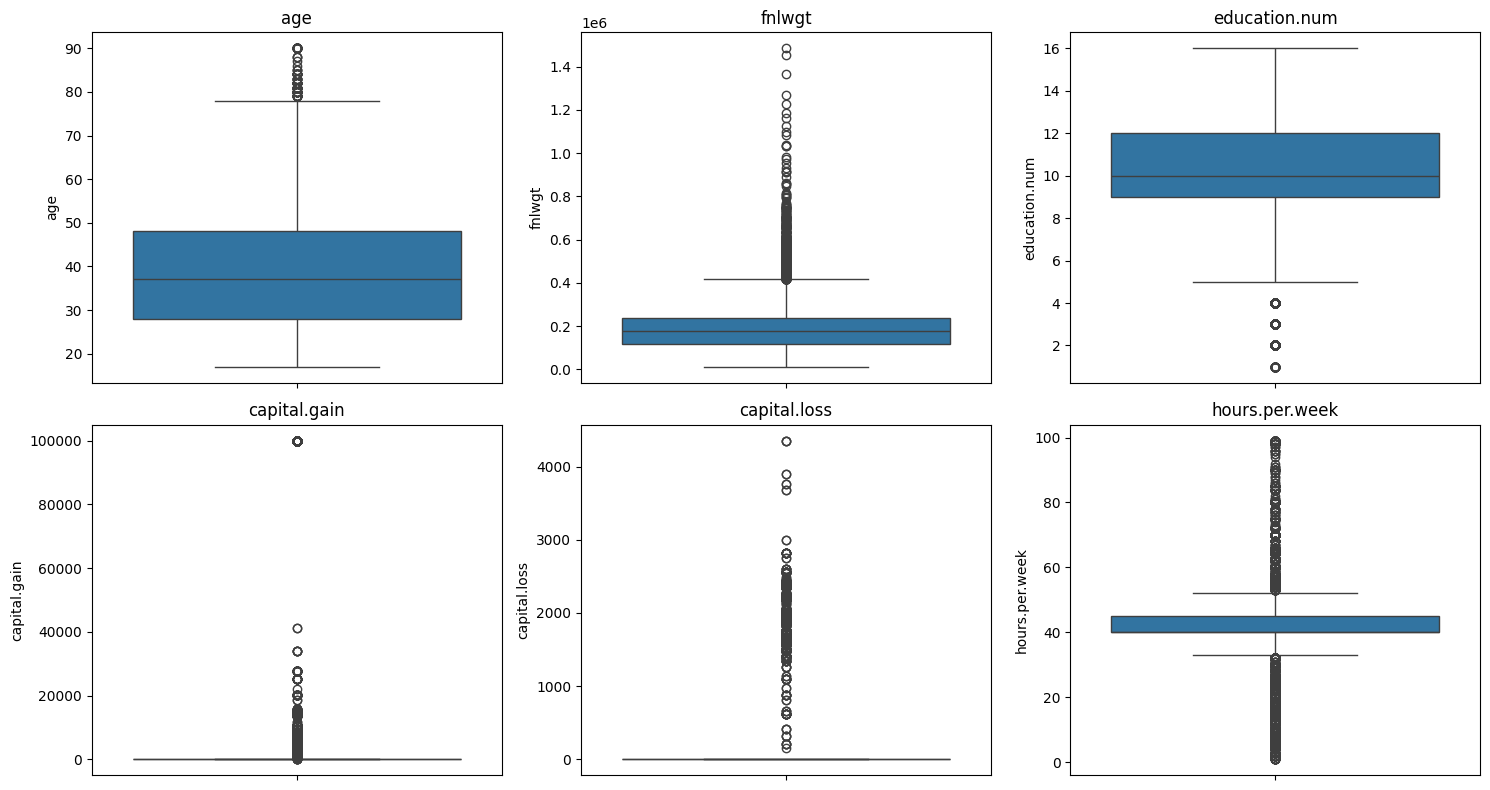

In [26]:
kolom_numerik = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
fig, axes = plt.subplots(2, 3, figsize=(15,8))
axes = axes.flatten()

for i, col in enumerate(kolom_numerik):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].tick_params(axis='x')  # miring per subplot
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

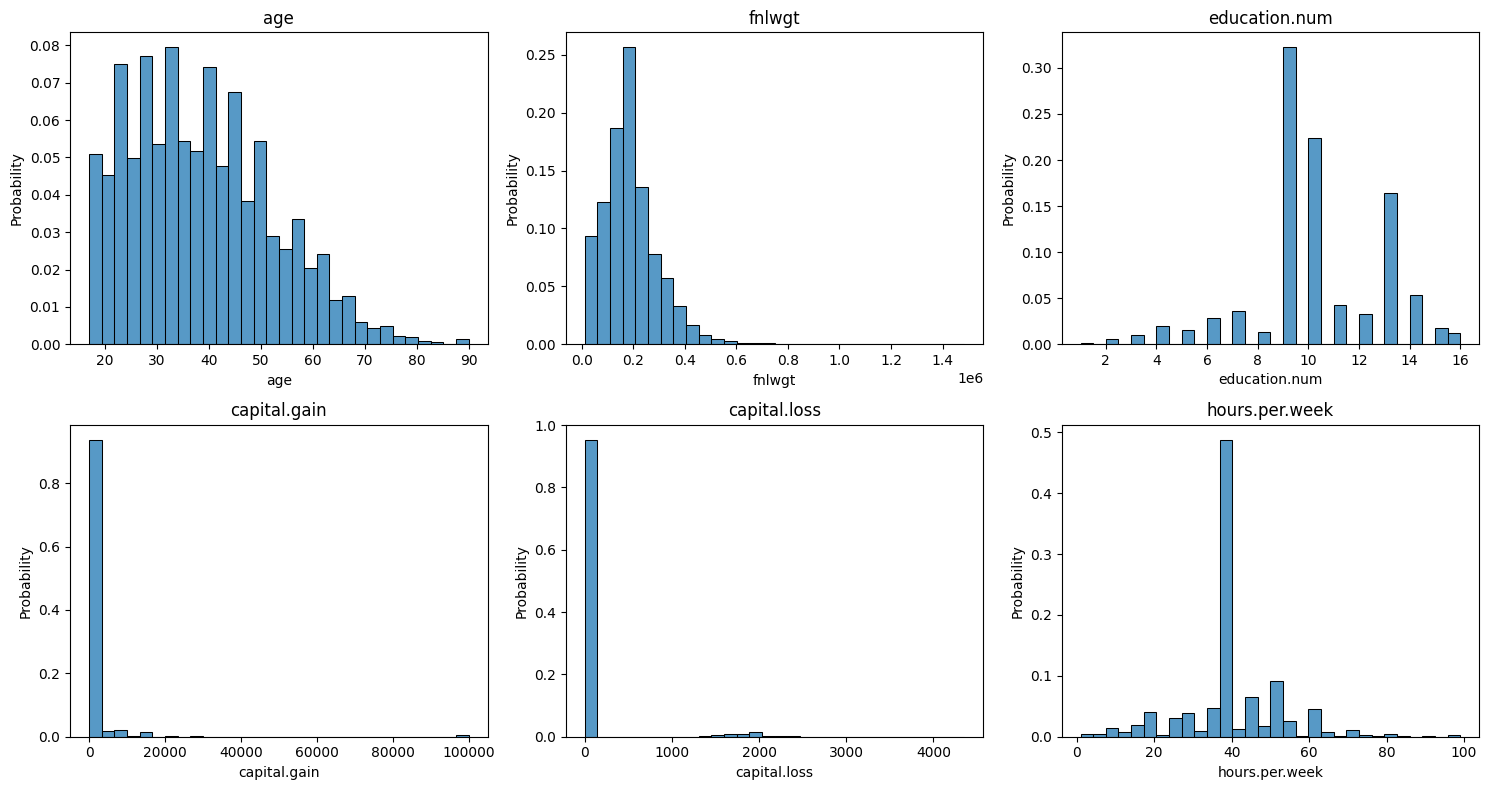

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(15,8))
axes = axes.flatten()

for i, col in enumerate(kolom_numerik):
    sns.histplot(df[col], ax=axes[i], stat='probability', bins=30)
    axes[i].tick_params(axis='x')  # miring per subplot
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

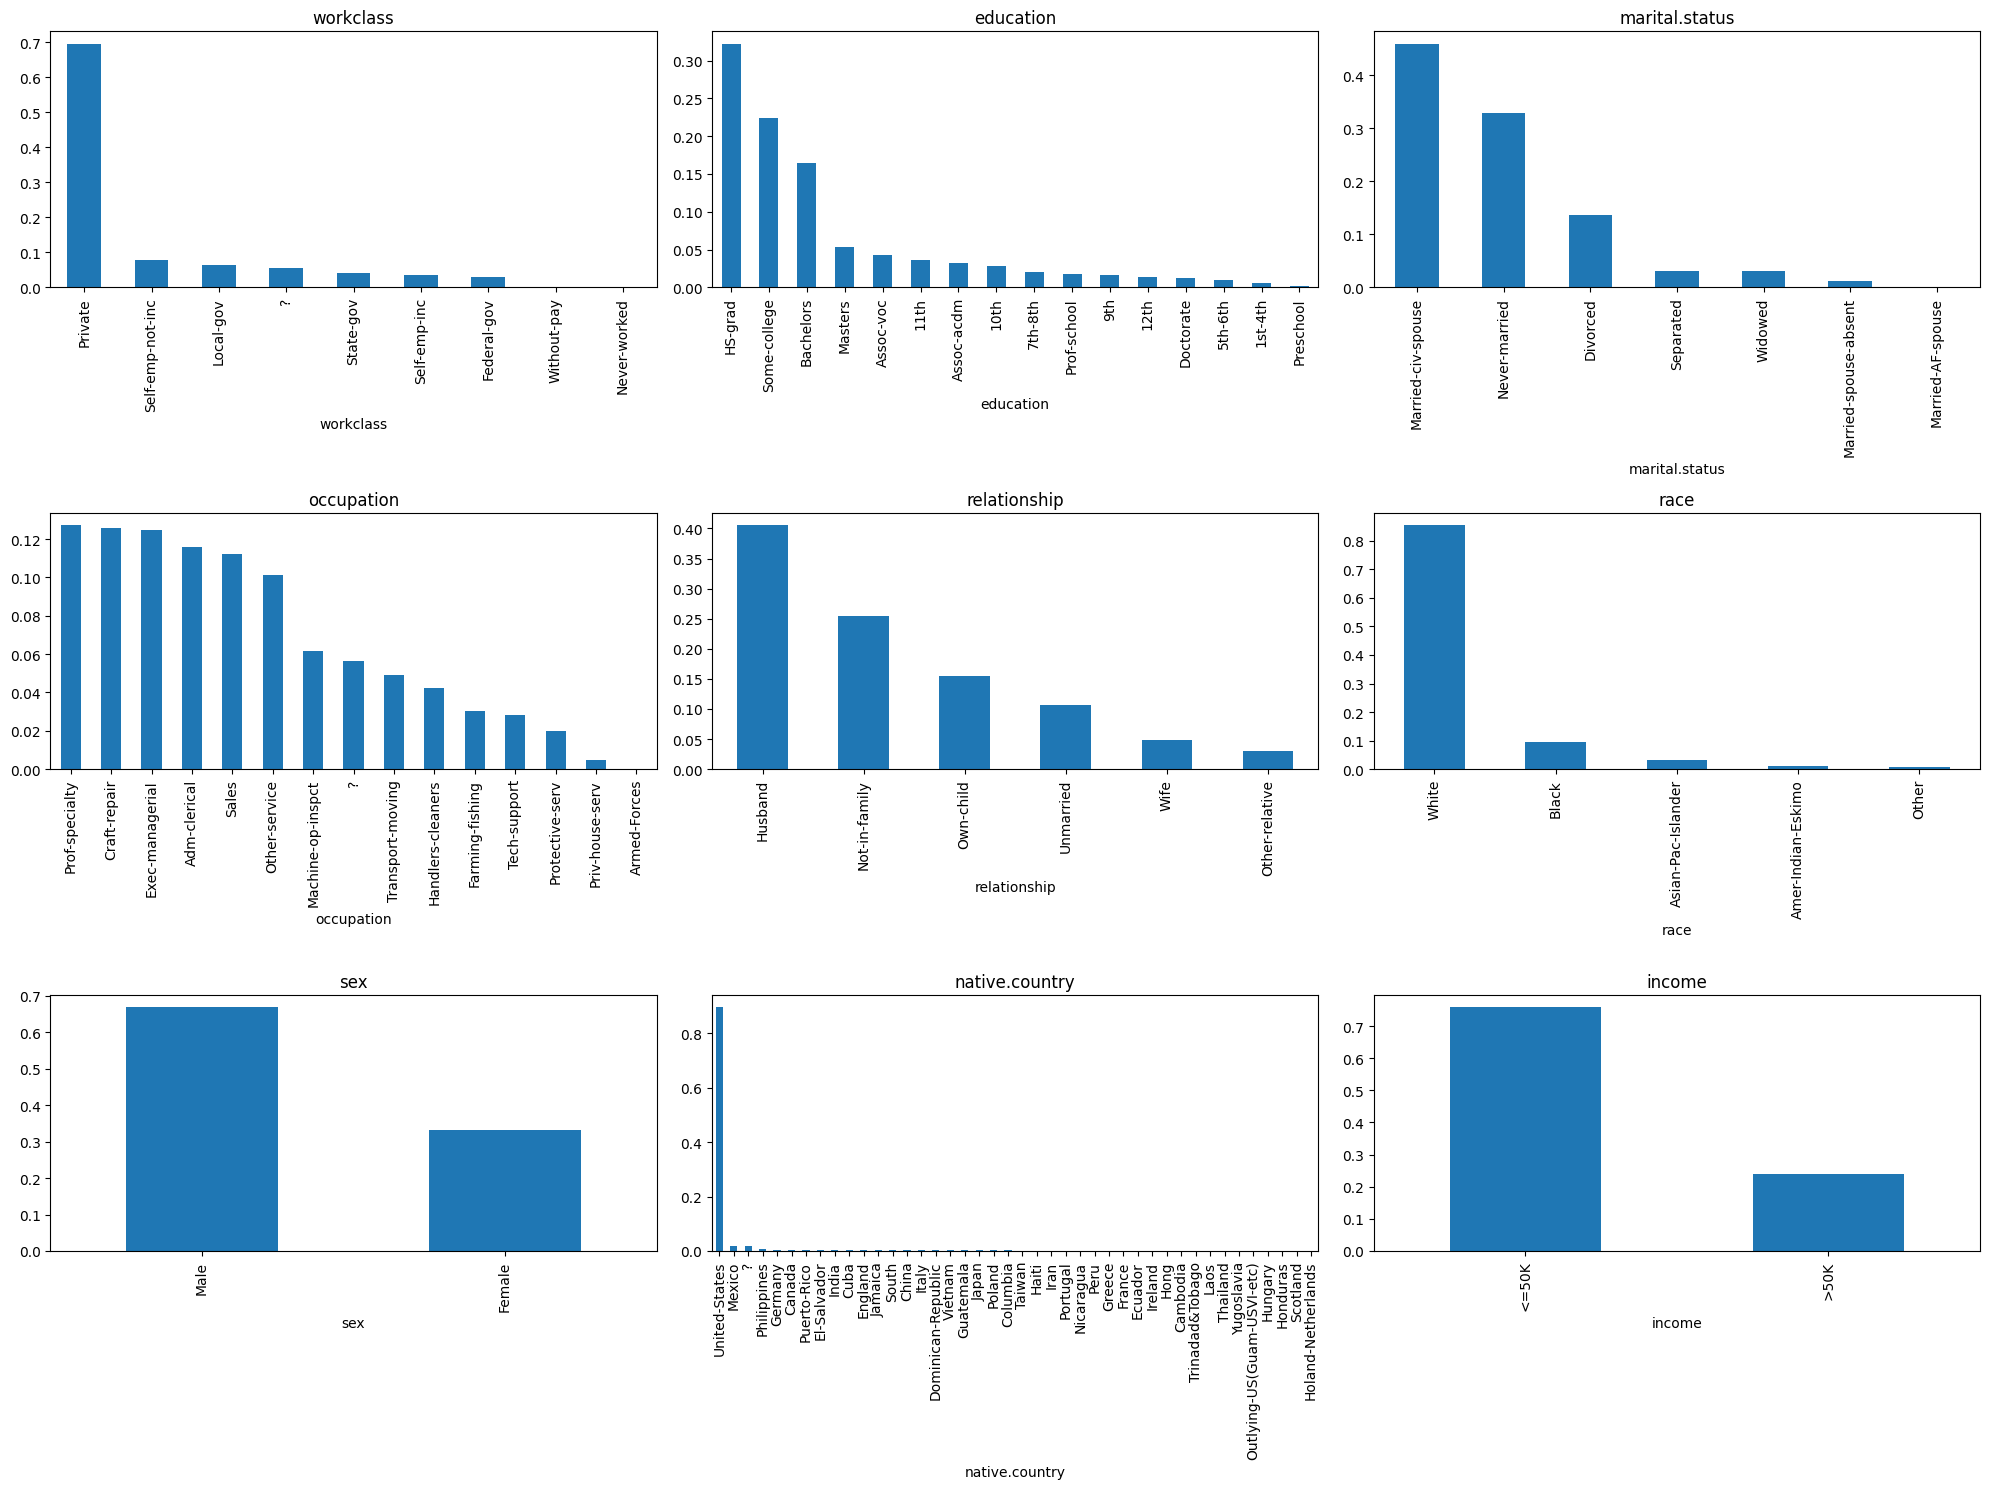

In [28]:
kolom_kategorikal =  df.select_dtypes(include=['object']).columns.tolist()
fig, axes = plt.subplots(3, 3, figsize=(20,15))
axes = axes.flatten()

for i, col in enumerate(kolom_kategorikal):
    df[col].value_counts(normalize=True).plot(kind='bar', ax=axes[i])
    axes[i].tick_params(axis='x', rotation=90)  # miring per subplot
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

<Axes: xlabel='income'>

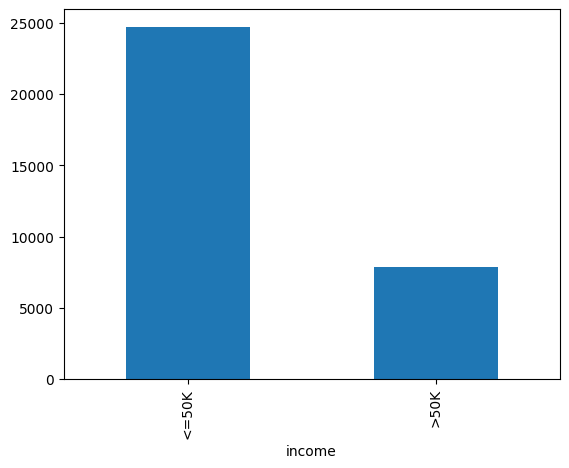

In [29]:
df['income'].value_counts().plot(kind='bar')

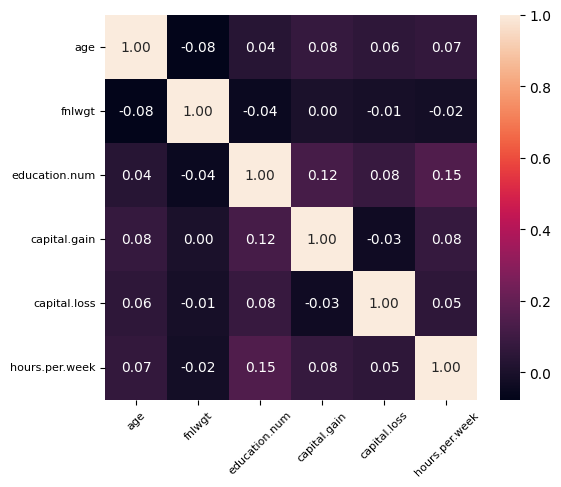

In [30]:
plt.figure(figsize=(6,5))
korelasi = df[kolom_numerik].corr(method='pearson')
sns.heatmap(korelasi, annot=True, fmt='.2f')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# 4. Data Cleaning & Preprocessing

bikin data pada kolom kategorikal yang proporsinya < 1% menjadi others

In [31]:
for col in kolom_kategorikal: 
    proporsi = df[col].value_counts(normalize=True)
    small_proporsi = proporsi[proporsi < 0.01].index
    df[col] = df[col].replace(small_proporsi, 'others')
    print(df[col].value_counts(normalize=True))
    print('-'*40)

workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
others              0.000645
Name: proportion, dtype: float64
----------------------------------------
education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
others          0.006726
Name: proportion, dtype: float64
----------------------------------------
marital.status
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
others

mapping income antara 0 dan 1

In [32]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

ubah value "?" menjadi NaN

In [33]:
kolom_ada_q = ['occupation', 'native.country', 'workclass']  # cari yang ada '?'

for c in kolom_ada_q:
    count = (df[c] == '?').sum()
    proportion = count / len(df)
    print(f"Kolom '{c}' memiliki {count} nilai '?' yang merupakan {proportion:.2%} dari total data.")

Kolom 'occupation' memiliki 1843 nilai '?' yang merupakan 5.66% dari total data.
Kolom 'native.country' memiliki 583 nilai '?' yang merupakan 1.79% dari total data.
Kolom 'workclass' memiliki 1836 nilai '?' yang merupakan 5.64% dari total data.


In [34]:
df[kolom_ada_q] = df[kolom_ada_q].replace('?', np.nan)

buat label "namaKolom_miss" karna bisa jadi ada value penting di dalam baris itu

In [35]:
for col in kolom_ada_q:
    df[col + '_miss'] = df[col].isna().astype(int)

Korelasi antar missing fitur

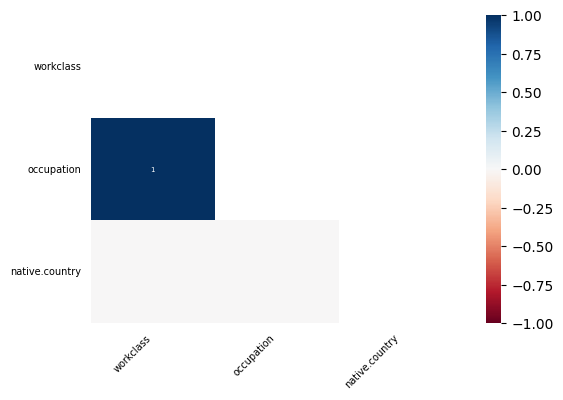

In [36]:
msno.heatmap(df, figsize=(6,4), fontsize=7)
plt.show()

gabungkan workclass dan occupation karna saling berkaitan, jadi kita hanya butuh 1 saja

In [37]:
df['occupation_workclass_missing'] = ((df['occupation'] == 'missing') & (df['workclass'] == 'missing')).astype(int)
df = df.drop(columns=['workclass_miss', 'occupation_miss'])

ganti NaN menjadi missing

In [38]:
df[kolom_ada_q] = df[kolom_ada_q].fillna('missing')

In [39]:
for c in df.select_dtypes(include=['int64', 'float64']).columns:
    q1 = df[c].quantile(0.01)
    q99 = df[c].quantile(0.99)
    df[c] = df[c].clip(q1, q99)

education == education.num dan fnlwgt tidak penting untuk klasifikasi income

In [40]:
df.drop(columns=['education', 'fnlwgt'], inplace=True)

# 5. Feature Engineering & Selection

In [41]:
x = pd.get_dummies(df.drop('income', axis=1), drop_first=True)
y = df['income']

smote = SMOTE(random_state=42, k_neighbors=3)
x_res, y_res = smote.fit_resample(x, y)
df_after_smote = pd.concat([x_res, y_res], axis=1)

x = df_after_smote.drop('income', axis=1)
y = df_after_smote['income']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

<Axes: xlabel='income'>

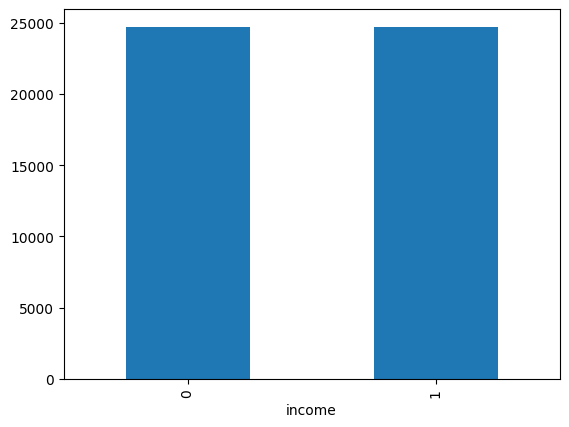

In [42]:
df_after_smote['income'].value_counts().plot(kind='bar')

# 6. Training

In [43]:
clf_gini = DecisionTreeClassifier(random_state=42, criterion='gini')
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

clf_entropy = DecisionTreeClassifier(random_state=42, criterion='entropy')
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)

Mencari parameter terbaik untuk decision tree

In [45]:
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 20]
}

grid_search = GridSearchCV(
    clf_gini,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)

y_pred_gini = grid_search.predict(X_test)

Best Params: {'max_depth': 20, 'min_samples_split': 10}


In [46]:
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 20]
}

grid_search = GridSearchCV(
    clf_entropy,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)

y_pred_entropy = grid_search.predict(X_test)

Best Params: {'max_depth': 20, 'min_samples_split': 20}


# 7. Evaluation

In [47]:
print("Accuracy clf:", accuracy_score(y_test, y_pred_gini))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gini))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gini))

Accuracy clf: 0.8688309061488673

Confusion Matrix:
 [[4136  808]
 [ 489 4455]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86      4944
           1       0.85      0.90      0.87      4944

    accuracy                           0.87      9888
   macro avg       0.87      0.87      0.87      9888
weighted avg       0.87      0.87      0.87      9888



In [48]:
print("Accuracy clf entropy:", accuracy_score(y_test, y_pred_entropy))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_entropy))
print("\nClassification Report:\n", classification_report(y_test, y_pred_entropy))

Accuracy clf entropy: 0.8668082524271845

Confusion Matrix:
 [[4116  828]
 [ 489 4455]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      4944
           1       0.84      0.90      0.87      4944

    accuracy                           0.87      9888
   macro avg       0.87      0.87      0.87      9888
weighted avg       0.87      0.87      0.87      9888



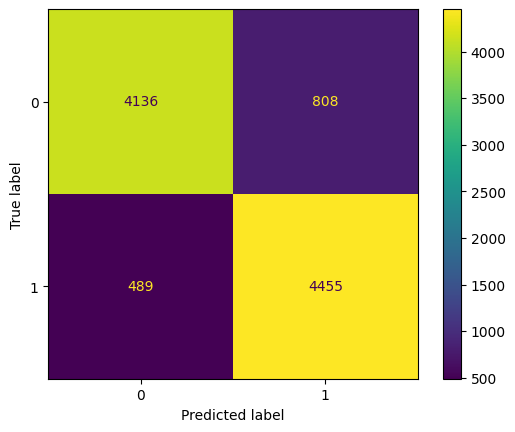

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gini)
plt.show()

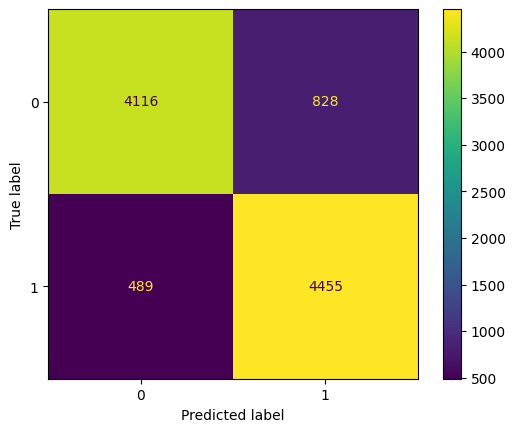

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_entropy)
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(
    clf_gini, 
    filled=True, 
    rounded=True, 
    feature_names=X_train.columns, 
    class_names=[str(c) for c in clf_gini.classes_]
)
plt.show()

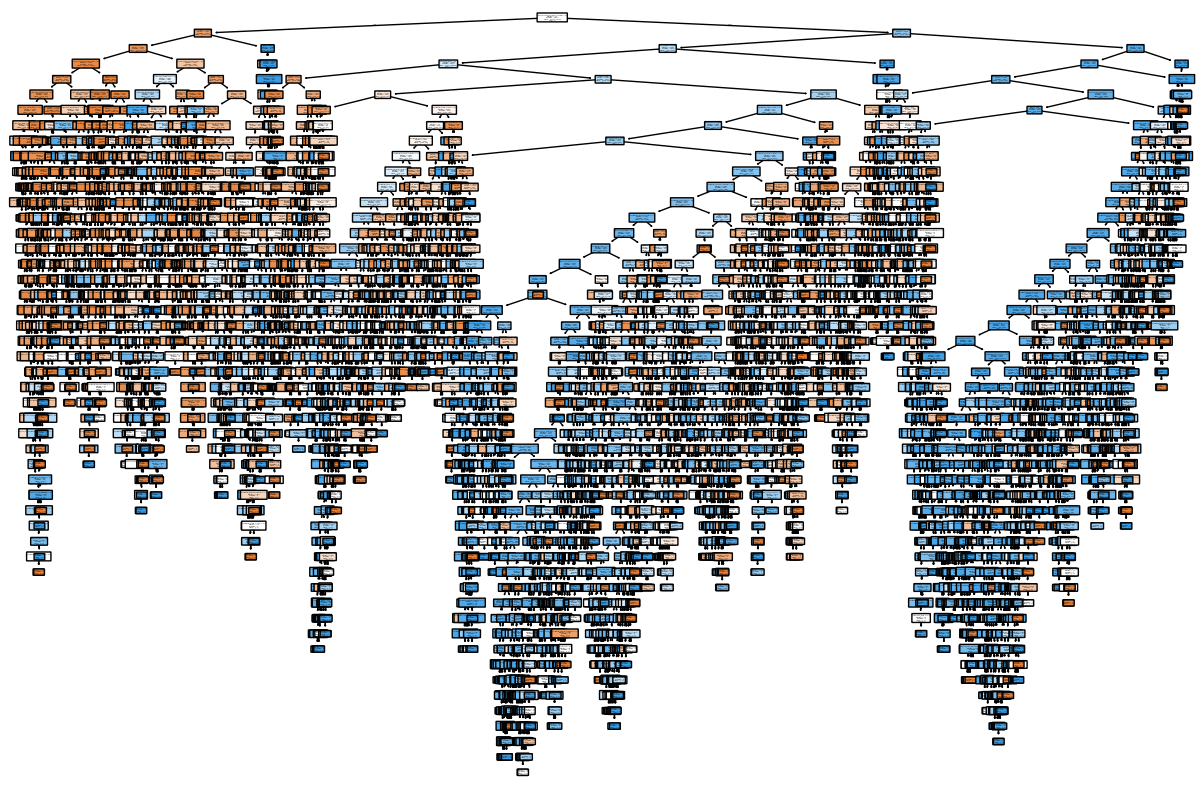

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(
    clf_entropy, 
    filled=True, 
    rounded=True, 
    feature_names=X_train.columns, 
    class_names=[str(c) for c in clf_entropy.classes_]
)
plt.show()

# 8. Kesimpulan

Model Decision Tree berhasil mencapai akurasi sekitar 85% dalam memprediksi Credit Score. Berdasarkan confusion matrix dan classification report, model memiliki kemampuan yang sangat baik dalam mengenali kelas mayoritas, namun performanya lebih rendah untuk kelas minoritas. Hal ini menunjukkan adanya ketidakseimbangan prediksi antar kelas.

Hasil GridSearchCV menunjukkan bahwa parameter terbaik berbeda untuk setiap kriteria:
- Gini: max_depth=20, min_samples_split=10
- Entropy: max_depth=20, min_samples_split=20

Perbedaan ini menegaskan bahwa pemilihan parameter berpengaruh terhadap performa dan generalisasi model. Semakin besar depth memberikan model lebih banyak fleksibilitas, namun harus diseimbangkan dengan min_samples_split agar tidak overfitting.